## NLP Assignment-2 Part-1 Task-1
#### Name: Ishaan Sinha
#### Roll number: 21CS30064

In [1]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [3]:
# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Task-1 a) Inspecting the data structure

In [4]:
print("Dataset columns:", ds['train'].column_names)
print("\nFirst story and headline in the dataset:")
print("\nHeadline: ", ds['train'][0]['highlights'])
print("\nStory: ", ds['train'][0]['article'])

Dataset columns: ['article', 'highlights', 'id']

First story and headline in the dataset:

Headline:  Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .

Story:  LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I

## Task-1 c) Performing basic text cleaning

In [5]:
def clean_text(text):
    """Preprocess text: lowercase, remove special characters, and tokenize."""
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Keep only words
    return tokens

# Cleaning headlines and stories
headlines = ds['train']['highlights']
stories = ds['train']['article']

# Tokenizing and cleaning text
cleaned_headlines = [clean_text(headline) for headline in headlines]
cleaned_stories = [clean_text(story) for story in stories]

# Flattening token lists for word frequency analysis
all_headline_words = [word for headline in cleaned_headlines for word in headline]
all_story_words = [word for story in cleaned_stories for word in story]

## Task-1 b) Exploring the most frequent words and sentence lengths

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


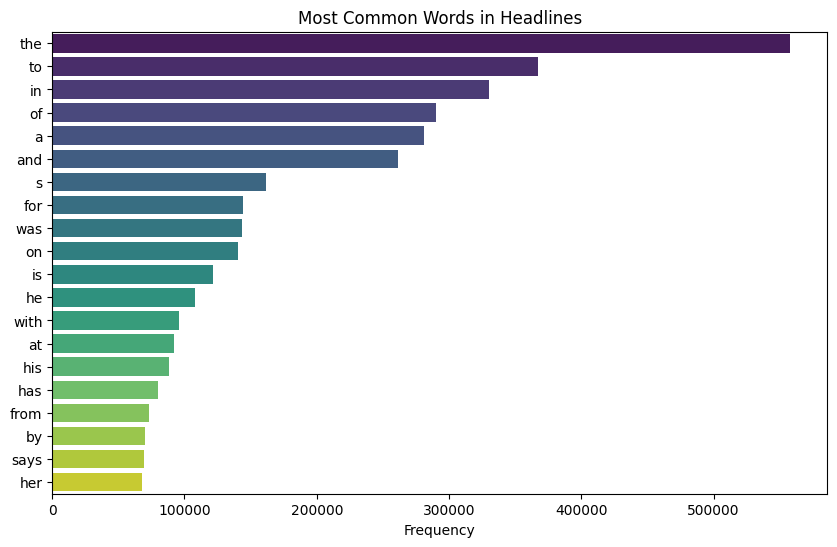

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


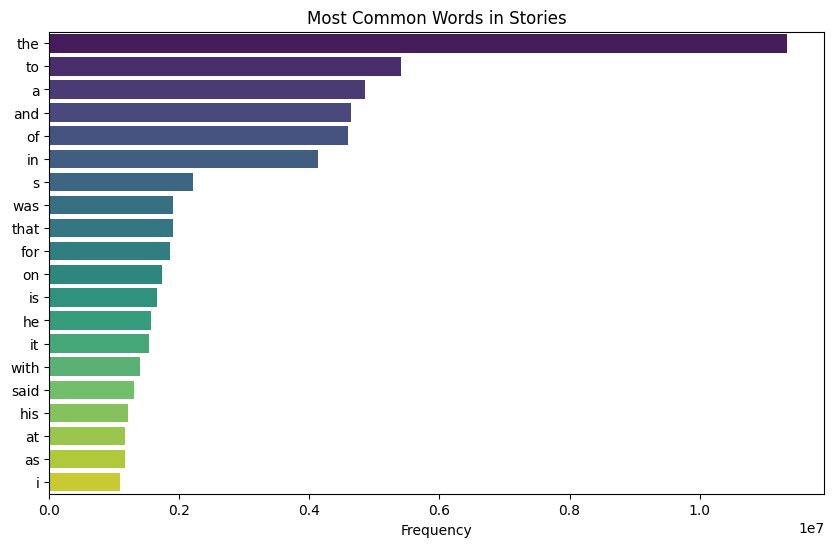

In [7]:
def plot_most_frequent_words(words, title, top_n=20):
    """Plot the most frequent words in the text."""
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words in {title}')
    plt.xlabel('Frequency')
    plt.show()

# Plot the most frequent words in headlines and stories
plot_most_frequent_words(all_headline_words, "Headlines", top_n=20)
plot_most_frequent_words(all_story_words, "Stories", top_n=20)

## Task-1 d) Sentence length distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


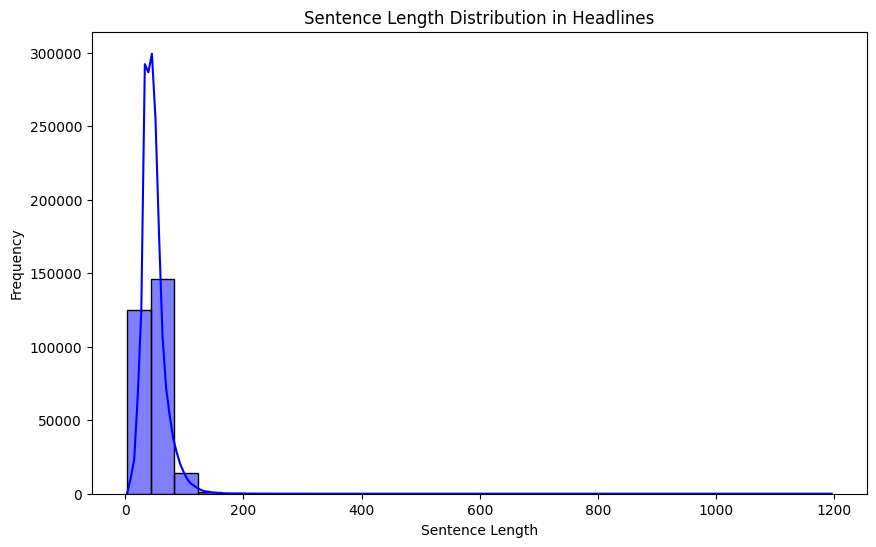

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


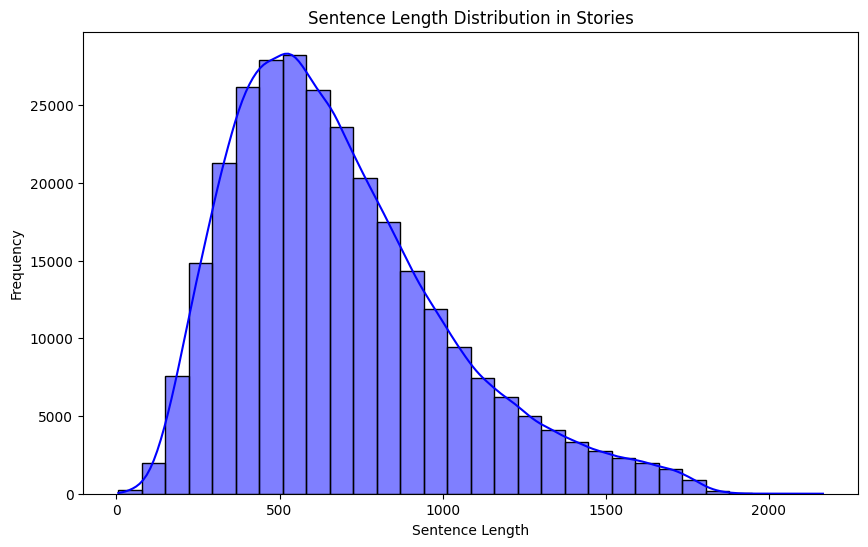

In [8]:
def sentence_lengths(text_list):
    """Calculate sentence lengths based on tokenized sentences."""
    return [len(text) for text in text_list]

# Calculating sentence lengths
headline_lengths = sentence_lengths(cleaned_headlines)
story_lengths = sentence_lengths(cleaned_stories)

# Plotting sentence length distributions
def plot_sentence_length_distribution(lengths, title):
    """Plot the distribution of sentence lengths."""
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=30, kde=True, color='blue')
    plt.title(f'Sentence Length Distribution in {title}')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()
    
plot_sentence_length_distribution(headline_lengths, "Headlines")
plot_sentence_length_distribution(story_lengths, "Stories")